In [1]:
!pip install -U numpy pandas plotnine

# Week 02 Notes

## Missing data

> **Missing data** occurs when the value for a variable is missing. It is a blank cell in an spreadsheet. Missing values can cause some problems during analysis.

Let's use the dataset `msleep` from the package plotnine.

In [2]:
from plotnine.data import msleep

import plotnine as pn
import numpy as np

msleep

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


> * We can see that a few variables contain the value NaN, which stands for not-a-number.
* These are the missing data.
* The ellipsis, …, in the middle row indicates not all rows are printed by default. So we may not be able to see all the variables with `NaNs`.

Each column/Series has a property `.hasnans` which returns `True` if the Series on which it is called has any `NaN`s.

In [3]:
msleep["conservation"].hasnans

True




> For calculating a mean or a standard deviation automatically ignores `NaN`s.

In [4]:
np.mean(msleep["brainwt"])

0.28158142857142854

But other times, `NaN`s are not automatically ignored, and nothing about the code or its output tells you when `NaN`s are ignored or not.

In [5]:
np.size(msleep["brainwt"])

83

The plotting package plotnine, by default, includes `NaN`s as its own category, which can be undesirable.

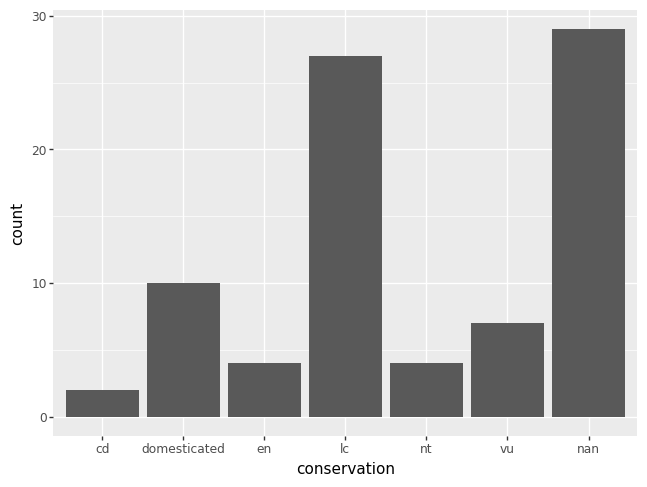

In [6]:
p = pn.ggplot(data = msleep) + pn.geom_bar(pn.aes(x = "conservation"))
p.draw()

To remove the missing data from a plot, create a new DataFrame by
dropping the mising data from the column of interest.  You should
always specify the keyword argument `subset`, lest you drop all
missing data, which might drop a row where the data is missing in a
column you care less about and subsequently drops data from the row
you do care about.

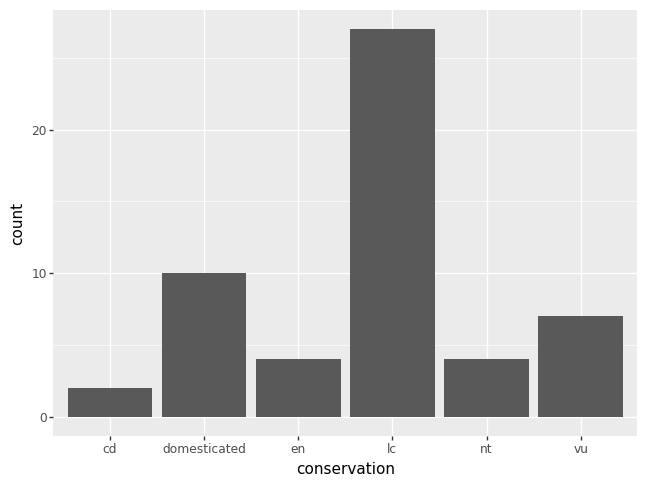

In [7]:
df = msleep.dropna(subset = "conservation")
p = pn.ggplot(data = df) + pn.geom_bar(pn.aes("conservation"))
p.draw()

The code equivalent of the last plot above is as follows.

In [8]:
msleep["conservation"].value_counts(dropna = True)

conservation
lc              27
domesticated    10
vu               7
en               4
nt               4
cd               2
Name: count, dtype: int64

## Summarize data

 > The **Pandas** property describe which excludes `NaN` values. Thus, we have a choice. Use `np.size` if we want a count of the number of elements including missing data, `NaNs`. Or use `.describe` if we want a count of the number of elements excluding missing data.

Here, we call `.describe` on a Series of type `category` elements,
that is a categorical variable named conservation.

In [9]:
msleep["conservation"].describe()

count     54
unique     6
top       lc
freq      27
Name: conservation, dtype: object

Here, we call `.describe` on a Series of type `float64` elements, that is a numeric variables named brainwt.

In [10]:
msleep["brainwt"].describe()

count    56.000000
mean      0.281581
std       0.976414
min       0.000140
25%       0.002900
50%       0.012400
75%       0.125500
max       5.712000
Name: brainwt, dtype: float64

> we can see all the **categories** by typing `.describe()` infront of msleep

In [11]:
msleep.describe()

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,83.000000,61.000000,32.000000,83.000000,56.000000,83.000000
mean,10.433735,1.875410,0.439583,13.567470,0.281581,166.136349
std,4.450357,1.298288,0.358680,4.452085,0.976414,786.839732
min,1.900000,0.100000,0.116667,4.100000,0.000140,0.005000
25%,7.850000,0.900000,0.183333,10.250000,0.002900,0.174000
50%,10.100000,1.500000,0.333333,13.900000,0.012400,1.670000
75%,13.750000,2.400000,0.579167,16.150000,0.125500,41.750000
max,19.900000,6.600000,1.500000,22.100000,5.712000,6654.000000


Since there is not much to be done with missing values other than
count them, here is a line of code you can use to count the number of
missing values.

In [12]:
nan_idx = msleep["conservation"].isna()
np.sum(nan_idx)

29

* The property/function ` .isna` returns a boolean series where each missing value is indexed by `True` and each non-missing value is indexed by `False`. Since `True` is equivalent to the number 1 and `False` is equivalent to 0 in Python, we can simply sum up the number of `True`s and `False`s to count the number of missing data.



## Creating/Editing new variables

* Imagine you want to create a new variable `brnbdywt` in the DataFrame `msleep`. This new variable might tell you something about how smart the animal is. The bigger the brain to body weight ratio, maybe the smarter the animal is.

* Just like for a `dict`, you can index into a DataFrame with a column name that does not yet exist, so long as you first assign to that column with some expression.

Create a new variable `brnbdywt` inside the DataFrame `msleep`, and assign to it the ratio of the columns `brainwt` and `bodywt`.

In [13]:
msleep["brnbdywt"] = msleep["brainwt"] / msleep["bodywt"]

> The division on the right hand side of `=` is done element-wise. Therefore, the Series created by the division of two Series has the same size as every column in `msleep`.

We have thus assigned to the new column `brnbdywt` a new variable that was created by the ratio of `brainwt` to `bodywt`.

In [14]:
msleep["brnbdywt"].describe()

count    56.000000
mean      0.010356
std       0.009251
min       0.000705
25%       0.003794
50%       0.006956
75%       0.015244
max       0.039604
Name: brnbdywt, dtype: float64

Let's create a new boolean variable named `smrt`, which will hold `True` whenever an animal is in the top 25% of the brain to body weight ratio and `False` otherwise.  We start by creating the new column and making every value equal to `False`.

In [15]:
msleep["smrt"] = False

> Since the right hand side of the equals is scalar, just one value, it is recycled as much as necessary to create a new column in `msleep` to keep the requirement that every column of a DataFrame has the same size.

Next, we create a boolean Series that indicates when an animal
qualifies as `smrt`.  Then, we over-write with the value `True` just
those rows for which we've identified a `smrt` animal.

In [16]:
smrt_idx = msleep["brnbdywt"] >= 0.015
msleep.loc[smrt_idx, "smrt"] = True

## Categorical variables

A categorical variable is a variable that has names or labels as
values.  We basically created a categorical variable above, with only
two values `True` and `False`, and named it `smrt`.  The only thing we
haven't done is convinced Python/Pandas to treat the variable `smrt`
as if the elements are of type `category`.

> * When the brnbdywt is enough then it is `true` as it is greater than or equal to 0.0015 (=75%).
* When the brnbdywt is not enough then it is `false` as it is not greater than or equal to 0.0015 (=75%).

In [17]:
msleep["smrt"] = msleep["smrt"].astype("category")
msleep["smrt"]

0     False
1      True
2     False
3      True
4     False
      ...  
78     True
79    False
80    False
81    False
82    False
Name: smrt, Length: 83, dtype: category
Categories (2, bool): [False, True]

Invariably with categorical variables, the categories you have are
not what you want.  Let's change the categories from `False` and `True` to
something else.

In [18]:
msleep["smrt"] = msleep["smrt"].cat.rename_categories({False: "nope", True: "yup"})

> Printing it

In [19]:
msleep["smrt"] = msleep["smrt"].cat.rename_categories({False: "nope", True: "yup"})
msleep["smrt"]

0     nope
1      yup
2     nope
3      yup
4     nope
      ... 
78     yup
79    nope
80    nope
81    nope
82    nope
Name: smrt, Length: 83, dtype: category
Categories (2, object): ['nope', 'yup']

> There’s two things to note here. First, the property `.cat` can only be called on a categorical Series; the elements must be recognized by Python/Pandas as type `category`. Second, the argument to `.rename_categories` is a `dict` with keys equal to the categories that you have, but don’t want, and values equal to the categories you want. The pattern in pseudo-code might be written as `{"old": "new"}`. The problem with this is that the keys don’t have to be of type `str`, as we saw above.


> We now have a variable with categories as names or labels, instead of `False` and `True`, we can develop more categories. Let’s break up the `"Nope"`s into two groups: `"meh"` for so-so smart animals and `"Nope"`. The `"meh"` group is in the middle.

In order to add this new category, we need to prime the Series `smrt` for the fact that we want to add a category that doesn't yet exist.

In [20]:
msleep["smrt"] = msleep["smrt"].cat.add_categories(["meh", "doh"])

> Next, let’s create a boolean series which indicates the exact rows which should be labeled as `"meh"`. The variable `meh_idx ` is one boolean Series created with logical and `&` of two boolean Series.

In an expression such as `a & b`, where `a` and `b` are both boolean Series, each element of `a` is compared to each element of `b`.  When both elements are `True`, the corresponding element of `meh_idx` is `True`.  If either element is `False`, the corresponding element of `meh_idx` id `False`.

In [21]:
meh_idx = (0.004 <= msleep["brnbdywt"]) & (msleep["brnbdywt"] < 0.015)
msleep.loc[meh_idx, "smrt"] = "meh"
msleep["smrt"]

0     nope
1      yup
2     nope
3      yup
4     nope
      ... 
78     yup
79    nope
80     meh
81     meh
82     meh
Name: smrt, Length: 83, dtype: category
Categories (4, object): ['nope', 'yup', 'meh', 'doh']

> lower than `0`.004 is `nope`. `meh` is 0.004≤ x < 0.015. Greater than `0.015` is `yup`.

The character `&`, read as **ampersand**, above is the logical equivalent of the word **and**. The character `|`, read as **pipe**, is the logical equivalent of the word **or**. To type an ampersand hold `shift` and press the number 7 above the letters Y and U on your keyboard. To type a pipe hold `shift` and press the backslash key, which is in between `enter/return ` and `backspace/delete`.



Here's how you can remove any unused categories.

In [22]:
msleep["smrt"] = msleep["smrt"].cat.remove_unused_categories()
msleep["smrt"]

0     nope
1      yup
2     nope
3      yup
4     nope
      ... 
78     yup
79    nope
80     meh
81     meh
82     meh
Name: smrt, Length: 83, dtype: category
Categories (3, object): ['nope', 'yup', 'meh']

> The function `remove_unused_categories()` is a safe bet, because no used category will be removed. Alternatively, the function **remove_categories([...])** will remove any specified categories, whether or not they are used. The function documentation warns “Values which were in the removed categories will be set to NaN”.